In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
# --- DATA ---
x_train = np.array([10, 15, 20, 25, 30])  # temperature
y_train = np.array([85, 70, 62, 48, 35])  # sold cups
number_of_examples = x_train.shape[0]

In [5]:
def linearRegression(weight, bias, x, examples_number):
    # Returns an array of all predictions (y_hat)
    y_hat = np.zeros(examples_number)
    for i in range(examples_number):
        y_hat[i] = weight * x[i] + bias
    return y_hat

In [6]:
def loss_function(examples_number, y_hat, y):
    loss_sum = 0
    for i in range(examples_number):
        error = y_hat[i] - y[i]
        loss_sum += error**2
    total_loss = (1 / (2 * examples_number)) * loss_sum
    return total_loss

In [7]:
def gradient(examples_number, x, y, weight, bias):
    d_dw = 0
    d_db = 0
    # Calculate predictions first to use in gradient
    y_hat = linearRegression(weight, bias, x, examples_number)

    for i in range(examples_number):
        # We use the prediction for the specific point [i]
        err_i = y_hat[i] - y[i]
        d_dw += err_i * x[i]
        d_db += err_i

    d_dw = d_dw / examples_number
    d_db = d_db / examples_number
    return d_dw, d_db

In [8]:
def gradient_descent(x, y, w_init, b_init, alpha, examples_number, iters):
    print("STARTING Gradient Descent...")
    j_history = []
    w = w_init
    b = b_init

    for i in range(iters):
        # We must calculate gradient INSIDE the loop every time w and b change
        d_dw, d_db = gradient(examples_number, x, y, w, b)

        # Update Parameters
        w = w - alpha * d_dw
        b = b - alpha * d_db

        # Save cost history
        current_y_hat = linearRegression(w, b, x, examples_number)
        cost = loss_function(examples_number, current_y_hat, y)
        j_history.append(cost)

        # Print progress 10 times during the run
        if i % (iters // 10) == 0:
            print(f"Iteration {i:4}: Cost {cost:0.2e} | w: {w:0.3f}, b: {b:0.3f}")

    return w, b, j_history

In [ ]:
def main_app():
    weight_init = 0
    bais_init = 0
    alpha = 0.001  # Increased slightly for better convergence
    iterations = 10000

    # Calculate final weights and bias
    weight_final, bais_final, j_history = gradient_descent(
        x_train, y_train, weight_init, bais_init, alpha, number_of_examples, iterations
    )

    print(f"\nFinal Results -> w: {weight_final:0.4f}, b: {bais_final:0.4f}")

    # --- GRAPHING ---
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

    # Graph 1: Cost History (The Suffering Plot)
    ax1.plot(j_history, color="purple")
    ax1.set_title("Cost Reduction Over Time")
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Cost")

    # Graph 2: The Result (The Barista's Model)
    ax2.scatter(x_train, y_train, marker="x", c="r", label="Actual Sales")
    y_final_line = weight_final * x_train + bais_final
    ax2.plot(x_train, y_final_line, label="Prediction Line", c="b")
    ax2.set_title("Temperature vs Cups Sold")
    ax2.set_xlabel("Temp (°C)")
    ax2.set_ylabel("Cups Sold")
    ax2.legend()

    plt.show()

    # The prediction formula: y = wx + b
    prediction_20 = weight_final * 20 + bais_final

    print(f"Prediction for 20°C: {prediction_20:0.2f} cups")

    # The prediction formula: y = wx + b

    prediction_20 = weight_final * 20 + bais_final

    print(f"Prediction for 20°C: {prediction_20:0.2f} cups")

    print(f"Prediction for 20°C: {weight_final} * 20 + {bais_final} = {prediction_20}")

STARTING Gradient Descent...
Iteration    0: Cost 1.05e+03 | w: 1.078, b: 0.060
Iteration 1000: Cost 5.27e+02 | w: 1.884, b: 11.527
Iteration 2000: Cost 4.22e+02 | w: 1.430, b: 21.737
Iteration 3000: Cost 3.38e+02 | w: 1.024, b: 30.876
Iteration 4000: Cost 2.71e+02 | w: 0.660, b: 39.056
Iteration 5000: Cost 2.17e+02 | w: 0.335, b: 46.377
Iteration 6000: Cost 1.74e+02 | w: 0.044, b: 52.930
Iteration 7000: Cost 1.40e+02 | w: -0.217, b: 58.794
Iteration 8000: Cost 1.12e+02 | w: -0.450, b: 64.043
Iteration 9000: Cost 9.01e+01 | w: -0.659, b: 68.742

Final Results -> w: -0.8459, b: 72.9425


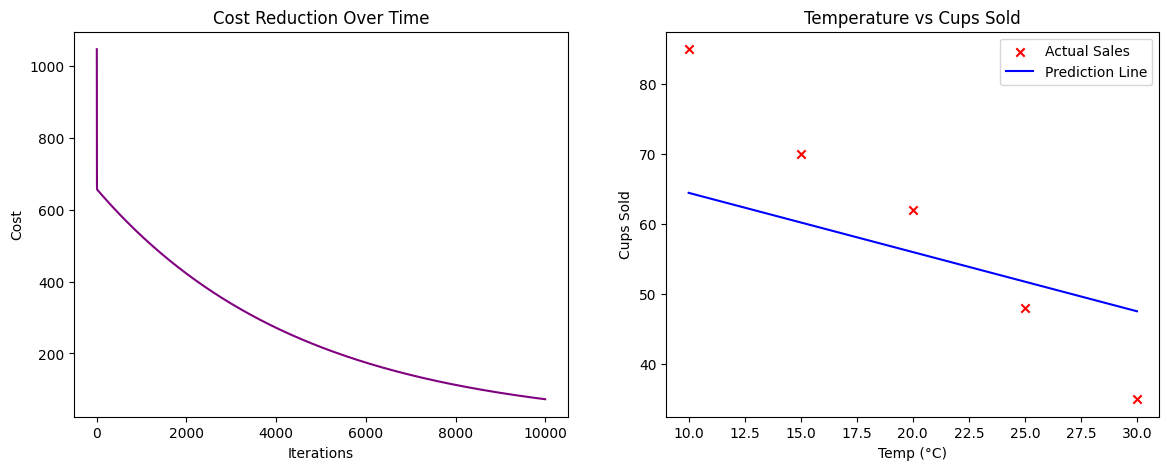

In [10]:
main_app()